# Visualizing FordGoBike Data(2017)
## by Anubhav Nehru

## Preliminary Wrangling

Bay Wheels (previously known as Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. The dataset used for this exploratory analysis consists of monthly individual trip data from June 2017 to December 2018 in CSV format covering the greater San Francisco Bay area. I was unable find gender columns , age column and some few more columns in the lyft website , so I have refered to the data that is also available here(https://drive.google.com/file/d/1FhzMjCIpv-kgZqauYcwTSPEkTMUH7jjm/view?usp=sharing).


In [1]:
# import all packages and set plots to be embedded inline
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

os.chdir("C:/Users/anubh/OneDrive/Documents/Project/Udacity/Untitled Folder")

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv("data.csv")

C:\Users\anubh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.drop(columns = ["Unnamed: 0" ,"Unnamed: 0.1"] , inplace = True)

In [4]:
df.shape

(1538086, 16)

In [5]:
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,1035,No,598,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.1870,1988.0,Male,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.0970,Subscriber
1,1673,No,943,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.9740,1987.0,Male,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-02-28 23:21:16.4950,Customer
2,3498,No,18587,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.9250,1986.0,Female,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:55.1900,Customer
3,3129,No,18558,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.4500,1981.0,Male,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:53.6210,Customer
4,1839,Yes,885,297.0,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.6080,1976.0,Female,308.0,37.336802,-121.894090,San Pedro Square,2018-02-28 23:15:12.8580,Subscriber


In [6]:
df.sample(10)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
570450,712,NaN,1215,160.0,37.805318,-122.294837,West Oakland BART Station,2017-10-07 07:52:53.8840,1985.0,Male,180.0,37.812678,-122.268773,Telegraph Ave at 23rd St,2017-10-07 07:32:38.2620,Subscriber
1532135,85,No,361,179.0,37.816073,-122.267886,Telegraph Ave at 27th St,2018-04-02 17:52:41.8440,1981.0,Male,183.0,37.808702,-122.269927,Telegraph Ave at 19th St,2018-04-02 17:46:40.5410,Customer
224758,1617,No,678,42.0,37.778650,-122.418230,San Francisco City Hall (Polk St at Grove St),2018-06-13 10:30:00.6780,1988.0,Female,39.0,37.778999,-122.436861,Scott St at Golden Gate Ave,2018-06-13 10:18:42.0390,Subscriber
1528208,3724,Yes,460,157.0,37.846784,-122.291376,65th St at Hollis St,2018-04-03 13:20:27.3270,1991.0,Female,241.0,37.852477,-122.270213,Ashby BART Station,2018-04-03 13:12:46.7570,Subscriber
1028654,2629,No,661,66.0,37.778742,-122.392741,3rd St at Townsend St,2018-01-24 12:55:44.6630,NaN,NaN,23.0,37.791464,-122.391034,The Embarcadero at Steuart St,2018-01-24 12:44:42.7320,Customer
347300,1476,NaN,585,24.0,37.789677,-122.390428,Spear St at Folsom St,2017-12-13 06:49:06.8490,1999.0,Male,81.0,37.775880,-122.393170,Berry St at 4th St,2017-12-13 06:39:20.8670,Subscriber
1020624,3729,No,621,62.0,37.777791,-122.406432,Victoria Manalo Draves Park,2018-01-26 17:46:30.0530,1980.0,Male,22.0,37.789756,-122.394643,Howard St at Beale St,2018-01-26 17:36:08.1240,Subscriber
845301,4218,No,1074,323.0,37.798014,-122.405950,Broadway at Kearny,2018-05-28 13:51:17.0940,1961.0,Female,44.0,37.781074,-122.411738,Civic Center/UN Plaza BART Station (Market St ...,2018-05-28 13:33:22.6140,Subscriber
842398,1792,No,495,130.0,37.757369,-122.392057,22nd St Caltrain Station,2018-05-29 08:04:46.6440,1983.0,Male,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-05-29 07:56:31.3160,Subscriber
1489056,2362,No,737,22.0,37.789756,-122.394643,Howard St at Beale St,2018-04-12 21:46:53.8080,1943.0,Male,42.0,37.778650,-122.418230,San Francisco City Hall (Polk St at Grove St),2018-04-12 21:34:35.8930,Subscriber


In [7]:
df.tail()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
1538081,1508,Yes,887,215.0,37.822547,-122.266318,34th St at Telegraph Ave,2018-04-01 00:14:55.5710,1988.0,Male,194.0,37.811081,-122.243268,Lakeshore Ave at Trestle Glen Rd,2018-04-01 00:00:08.1630,Subscriber
1538082,629,No,387,79.0,37.773492,-122.403672,7th St at Brannan St,2018-04-01 00:14:33.9940,1995.0,Female,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-04-01 00:08:06.3670,Subscriber
1538083,2070,No,480,21.0,37.789625,-122.400811,Montgomery St BART Station (Market St at 2nd St),2018-04-01 00:14:21.4600,1984.0,Male,44.0,37.781074,-122.411738,Civic Center/UN Plaza BART Station (Market St ...,2018-04-01 00:06:21.2810,Customer
1538084,2556,No,503,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-04-01 00:13:00.1020,1984.0,Female,100.0,37.767100,-122.410662,Bryant St at 15th St,2018-04-01 00:04:36.8050,Subscriber
1538085,2144,No,192,215.0,37.822547,-122.266318,34th St at Telegraph Ave,2018-04-01 00:05:16.4430,1984.0,Male,176.0,37.828410,-122.266315,MacArthur BART Station,2018-04-01 00:02:03.8270,Customer


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538086 entries, 0 to 1538085
Data columns (total 16 columns):
bike_id                    1538086 non-null int64
bike_share_for_all_trip    1018386 non-null object
duration_sec               1538086 non-null int64
end_station_id             1532841 non-null float64
end_station_latitude       1538086 non-null float64
end_station_longitude      1538086 non-null float64
end_station_name           1532841 non-null object
end_time                   1538086 non-null object
member_birth_year          1400419 non-null float64
member_gender              1400760 non-null object
start_station_id           1532841 non-null float64
start_station_latitude     1538086 non-null float64
start_station_longitude    1538086 non-null float64
start_station_name         1532841 non-null object
start_time                 1538086 non-null object
user_type                  1538086 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 187.8+ MB


- start_time and end_time to be converted into datetime format
- start_station_id ,end_station_id ,bike_id to be converted into string format

In [9]:
df.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,1.538086e+06,1.538086e+06,1.532841e+06,1.538086e+06,1.538086e+06,1.400419e+06,1.532841e+06,1.538086e+06,1.538086e+06
mean,2.020603e+03,9.573795e+02,1.056254e+02,3.776912e+01,-1.223547e+02,1.981805e+03,1.076984e+02,3.776897e+01,-1.223553e+02
std,1.152290e+03,2.891834e+03,9.259640e+01,9.756527e-02,1.517343e-01,1.056463e+01,9.297119e+01,9.766799e-02,1.521276e-01
min,1.000000e+01,6.100000e+01,3.000000e+00,3.728000e+01,-1.224443e+02,1.881000e+03,3.000000e+00,3.731285e+01,-1.224443e+02
25%,1.045000e+03,3.610000e+02,2.700000e+01,3.777241e+01,-1.224103e+02,1.976000e+03,2.800000e+01,3.777179e+01,-1.224117e+02
50%,2.072000e+03,5.690000e+02,7.700000e+01,3.778240e+01,-1.223974e+02,1.984000e+03,7.900000e+01,3.778175e+01,-1.223984e+02
75%,2.952000e+03,8.970000e+02,1.710000e+02,3.779539e+01,-1.223881e+02,1.989000e+03,1.730000e+02,3.779539e+01,-1.223881e+02
max,4.307000e+03,8.636900e+04,3.570000e+02,4.551000e+01,-7.357000e+01,2.000000e+03,3.570000e+02,4.551000e+01,-7.357000e+01


In [10]:
df.isnull().sum()

bike_id                         0
bike_share_for_all_trip    519700
duration_sec                    0
end_station_id               5245
end_station_latitude            0
end_station_longitude           0
end_station_name             5245
end_time                        0
member_birth_year          137667
member_gender              137326
start_station_id             5245
start_station_latitude          0
start_station_longitude         0
start_station_name           5245
start_time                      0
user_type                       0
dtype: int64

In [11]:
df.duplicated().sum()

0

## What is the structure of your dataset?
There are 1538086 Ford GoBike trips in the dataset with 16 columns. Out of 16 columns 9 should be numerical, 2 should be datetime, 4 should be object type and 1 should be boolean type.

## What is/are the main feature(s) of interest in your dataset?
I think the main features of my interest in this dataset will be the trip duration time and the gender of the users.

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I think the features that will support my investigation in the data set will be the type of user , age of the user and start time of the trip.

## Cleaning
**I have found some quality issues in the data ,that need to be taken care of and below is the list of the quality issues that I will clean from the data:**<br>

- The data has missing values present in it<br>
- Bike share for all trips columns has maximum number of null values and the null values should be replaced by NA(Not applicable)
- Member birth is in the float format, but should be converted to integer format<br>
- Member birthdates have lots of missing values
- Start/end times are not in the timestamp format<br>
- start_station_id and end_station_id should be converted into string format<br>


In [12]:
#creating a copy of the file as df_clean
df_clean = df.copy()

### Define: Converting several of the columns to the appropriate data type:
- Starting and ending times to the timestamp format<br>
- start station ID, end station ID and bikeid to object format<br>


**Code**

In [13]:
#converting start_time and end_time into datetime format
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [14]:
#converting start_station_id , end_station_id and bike_id to string
df_clean.start_station_id = df_clean.start_station_id.astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(str)
df_clean.bike_id = df_clean.bike_id.astype(str)

**Test**

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538086 entries, 0 to 1538085
Data columns (total 16 columns):
bike_id                    1538086 non-null object
bike_share_for_all_trip    1018386 non-null object
duration_sec               1538086 non-null int64
end_station_id             1538086 non-null object
end_station_latitude       1538086 non-null float64
end_station_longitude      1538086 non-null float64
end_station_name           1532841 non-null object
end_time                   1538086 non-null datetime64[ns]
member_birth_year          1400419 non-null float64
member_gender              1400760 non-null object
start_station_id           1538086 non-null object
start_station_latitude     1538086 non-null float64
start_station_longitude    1538086 non-null float64
start_station_name         1532841 non-null object
start_time                 1538086 non-null datetime64[ns]
user_type                  1538086 non-null object
dtypes: datetime64[ns](2), float64(5), int64(1), ob

In [16]:
df_clean.isnull().sum()

bike_id                         0
bike_share_for_all_trip    519700
duration_sec                    0
end_station_id                  0
end_station_latitude            0
end_station_longitude           0
end_station_name             5245
end_time                        0
member_birth_year          137667
member_gender              137326
start_station_id                0
start_station_latitude          0
start_station_longitude         0
start_station_name           5245
start_time                      0
user_type                       0
dtype: int64

Bike_Share

In [17]:
df_clean.bike_share_for_all_trip.describe()

count     1018386
unique          2
top            No
freq       934032
Name: bike_share_for_all_trip, dtype: object

In [18]:
df_clean.bike_share_for_all_trip.value_counts(dropna = False)

No     934032
NaN    519700
Yes     84354
Name: bike_share_for_all_trip, dtype: int64

In [19]:
df_clean[df_clean["bike_share_for_all_trip"].isnull()].sample(20)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
499534,2069,NaN,1044,24.0,37.789677,-122.390428,Spear St at Folsom St,2017-10-27 12:10:44.377,NaN,NaN,61.0,37.776513,-122.411306,Howard St at 8th St,2017-10-27 11:53:19.531,Customer
609560,1953,NaN,639,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2017-09-26 17:22:09.377,1990.0,Male,59.0,37.774814,-122.418954,S Van Ness Ave at Market St,2017-09-26 17:11:29.560,Subscriber
667754,1112,NaN,280,212.0,37.824931,-122.260479,Mosswood Park,2017-09-09 10:03:18.315,1991.0,Male,175.0,37.835946,-122.262366,49th St at Telegraph Ave,2017-09-09 09:58:37.460,Subscriber
747907,2478,NaN,185,56.0,37.773414,-122.427317,Koshland Park,2017-08-12 14:37:50.103,1991.0,Female,56.0,37.773414,-122.427317,Koshland Park,2017-08-12 14:34:44.467,Customer
654502,1374,NaN,1718,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2017-09-13 13:05:10.885,NaN,NaN,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2017-09-13 12:36:32.629,Customer
672639,986,NaN,609,40.0,37.779208,-122.426829,Laguna St at McAllister St,2017-09-07 18:29:58.047,1975.0,Female,44.0,37.781074,-122.411738,Civic Center/UN Plaza BART Station (Market St ...,2017-09-07 18:19:48.461,Subscriber
564774,522,NaN,384,182.0,37.809013,-122.268247,19th Street BART Station,2017-10-09 10:44:28.225,1989.0,Male,195.0,37.812314,-122.260779,Bay Pl at Vernon St,2017-10-09 10:38:03.395,Subscriber
799634,278,NaN,257,90.0,37.771058,-122.402717,Townsend St at 7th St,2017-07-18 21:16:24.439,1980.0,Male,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2017-07-18 21:12:07.151,Subscriber
416963,257,NaN,1446,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-11-21 08:54:11.898,1968.0,Male,130.0,37.757369,-122.392057,22nd St Caltrain Station,2017-11-21 08:30:05.584,Subscriber
416222,598,NaN,531,45.0,37.781752,-122.405127,5th St at Howard St,2017-11-21 11:40:08.493,1983.0,Female,79.0,37.773492,-122.403673,7th St at Brannan St,2017-11-21 11:31:17.335,Subscriber


In [20]:
#Filling NaN values with NA (Not applicable), since it maybe the case that the bike
#sharing service was started from 2018 and most of the mising values are in 2017
df_clean.bike_share_for_all_trip.fillna("NA" ,inplace = True)

**Test**

In [21]:
df_clean.isnull().sum()

bike_id                         0
bike_share_for_all_trip         0
duration_sec                    0
end_station_id                  0
end_station_latitude            0
end_station_longitude           0
end_station_name             5245
end_time                        0
member_birth_year          137667
member_gender              137326
start_station_id                0
start_station_latitude          0
start_station_longitude         0
start_station_name           5245
start_time                      0
user_type                       0
dtype: int64

In [22]:
df_clean[df_clean["member_gender"].isnull()].sample(20)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
703845,1167,NA,1340,144.0,37.747300,-122.411403,Precita Park,2017-08-28 17:31:47.585,NaN,NaN,42.0,37.778650,-122.418230,San Francisco City Hall (Polk St at Grove St),2017-08-28 17:09:27.153,Customer
569618,1011,NA,605,144.0,37.747300,-122.411403,Precita Park,2017-10-07 13:27:49.178,NaN,NaN,124.0,37.760447,-122.410807,19th St at Florida St,2017-10-07 13:17:43.207,Customer
469338,1253,NA,4752,16.0,37.794130,-122.394430,Steuart St at Market St,2017-11-05 14:53:54.561,NaN,NaN,20.0,37.791300,-122.399051,Mechanics Monument Plaza (Market St at Bush St),2017-11-05 13:34:41.833,Customer
562410,3036,NA,5080,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2017-10-09 21:44:39.361,NaN,NaN,10.0,37.795393,-122.404770,Washington St at Kearny St,2017-10-09 20:19:58.760,Customer
1272247,2853,No,3487,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-07-05 12:07:38.562,NaN,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2018-07-05 11:09:31.529,Customer
956345,2496,No,374,50.0,37.780526,-122.390288,2nd St at Townsend St,2018-05-08 19:05:39.332,NaN,NaN,21.0,37.789625,-122.400811,Montgomery St BART Station (Market St at 2nd St),2018-05-08 18:59:24.797,Subscriber
376091,1604,NA,484,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2017-12-05 08:57:20.542,NaN,NaN,89.0,37.769218,-122.407646,Division St at Potrero Ave,2017-12-05 08:49:15.687,Customer
609097,674,NA,1381,44.0,37.781074,-122.411738,Civic Center/UN Plaza BART Station (Market St ...,2017-09-26 18:21:53.317,NaN,NaN,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2017-09-26 17:58:51.793,Customer
1199127,251,No,573,249.0,37.858473,-122.253253,Russell St at College Ave,2018-07-16 18:24:42.263,NaN,NaN,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2018-07-16 18:15:09.181,Customer
1260301,2186,No,554,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-07-07 12:10:34.987,NaN,NaN,50.0,37.780526,-122.390288,2nd St at Townsend St,2018-07-07 12:01:20.084,Customer


In [23]:
df_clean.member_gender.value_counts()

Male      1043512
Female     336222
Other       21026
Name: member_gender, dtype: int64

In [24]:
df_clean.member_birth_year.describe()

count    1.400419e+06
mean     1.981805e+03
std      1.056463e+01
min      1.881000e+03
25%      1.976000e+03
50%      1.984000e+03
75%      1.989000e+03
max      2.000000e+03
Name: member_birth_year, dtype: float64

In [25]:
#checking the % of missing value in the data
137667/len(df_clean)*100

8.950539826771715

In [26]:
df_clean.dropna(inplace = True)

**Test**

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395361 entries, 0 to 1538085
Data columns (total 16 columns):
bike_id                    1395361 non-null object
bike_share_for_all_trip    1395361 non-null object
duration_sec               1395361 non-null int64
end_station_id             1395361 non-null object
end_station_latitude       1395361 non-null float64
end_station_longitude      1395361 non-null float64
end_station_name           1395361 non-null object
end_time                   1395361 non-null datetime64[ns]
member_birth_year          1395361 non-null float64
member_gender              1395361 non-null object
start_station_id           1395361 non-null object
start_station_latitude     1395361 non-null float64
start_station_longitude    1395361 non-null float64
start_station_name         1395361 non-null object
start_time                 1395361 non-null datetime64[ns]
user_type                  1395361 non-null object
dtypes: datetime64[ns](2), float64(5), int64(1), ob

### Define : Creating a new column named member_age which will contain the age of the users

**Code**

In [28]:
# Subtracting the member_birth_year from the current year to get the ages of the members
df_clean['member_age'] = 2020 - df_clean['member_birth_year']

**Test**

In [29]:
df_clean.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age
0,1035,No,598,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.187,1988.0,Male,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.097,Subscriber,32.0
1,1673,No,943,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.974,1987.0,Male,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-02-28 23:21:16.495,Customer,33.0
2,3498,No,18587,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.925,1986.0,Female,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:55.190,Customer,34.0
3,3129,No,18558,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.450,1981.0,Male,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:53.621,Customer,39.0
4,1839,Yes,885,297.0,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.608,1976.0,Female,308.0,37.336802,-121.894090,San Pedro Square,2018-02-28 23:15:12.858,Subscriber,44.0


### Define : Checking the different percentiles of age group in the member_age column

**Code**

In [30]:
df_clean.member_age.describe()

count    1.395361e+06
mean     3.821268e+01
std      1.056918e+01
min      2.000000e+01
25%      3.100000e+01
50%      3.600000e+01
75%      4.400000e+01
max      1.390000e+02
Name: member_age, dtype: float64

In [31]:
df_clean.member_age.median()

36.0

In [32]:
df_clean.member_age.describe(percentiles = [.25 , .75 ,.99])

count    1.395361e+06
mean     3.821268e+01
std      1.056918e+01
min      2.000000e+01
25%      3.100000e+01
50%      3.600000e+01
75%      4.400000e+01
99%      6.800000e+01
max      1.390000e+02
Name: member_age, dtype: float64

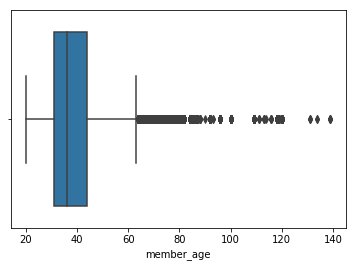

In [33]:
sns.boxplot(x = df_clean["member_age"])

In [34]:
#calculating the iqr
q1  = df_clean.member_age.quantile(0.25)
q3  = df_clean.member_age.quantile(0.75)
iqr = q3 - q1

lr = q1 - (1.5 * iqr)
ur = q3 + (1.5 * iqr)
print("The lower range is {} and the upper range is {}".format(lr,ur))

The lower range is 11.5 and the upper range is 63.5


In [35]:
#taking ages less than 64 in our dataset
df_clean = df_clean[df_clean["member_age"] < 64]

**Test**

In [36]:
df_clean.sample(10)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age
142144,3725,No,1410,160.0,37.805318,-122.294837,West Oakland BART Station,2018-06-26 07:25:42.936,1963.0,Female,188.0,37.842630,-122.267738,Dover St at 57th St,2018-06-26 07:02:12.141,Subscriber,57.0
713554,2658,NA,932,85.0,37.770083,-122.429156,Church St at Duboce Ave,2017-08-24 21:15:51.091,1988.0,Male,19.0,37.788975,-122.403452,Post St at Kearny St,2017-08-24 21:00:18.873,Subscriber,32.0
1377458,1296,No,284,176.0,37.828410,-122.266315,MacArthur BART Station,2018-03-09 10:42:15.298,1978.0,Male,150.0,37.831277,-122.278267,Adeline St at 40th St,2018-03-09 10:37:31.265,Subscriber,42.0
345369,2444,NA,338,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-12-13 13:15:48.569,1993.0,Male,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2017-12-13 13:10:10.166,Subscriber,27.0
598794,2864,NA,426,66.0,37.778742,-122.392741,3rd St at Townsend St,2017-09-29 09:39:05.784,1972.0,Male,21.0,37.789625,-122.400811,Montgomery St BART Station (Market St at 2nd St),2017-09-29 09:31:58.847,Subscriber,48.0
1443806,2388,No,694,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-04-24 07:52:55.974,1986.0,Male,23.0,37.791464,-122.391034,The Embarcadero at Steuart St,2018-04-24 07:41:21.861,Subscriber,34.0
1463275,2477,No,3430,64.0,37.776754,-122.399018,5th St at Brannan St,2018-04-19 10:31:55.507,1996.0,Male,64.0,37.776754,-122.399018,5th St at Brannan St,2018-04-19 09:34:44.917,Customer,24.0
177665,2457,No,579,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-06-20 16:53:57.049,1982.0,Male,59.0,37.774814,-122.418954,S Van Ness Ave at Market St,2018-06-20 16:44:17.376,Subscriber,38.0
492056,424,NA,566,22.0,37.789756,-122.394643,Howard St at Beale St,2017-10-30 09:09:27.317,1983.0,Male,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2017-10-30 09:00:00.437,Subscriber,37.0
477764,3121,NA,453,108.0,37.764710,-122.419957,16th St Mission BART,2017-11-02 17:26:35.493,1994.0,Female,124.0,37.760447,-122.410807,19th St at Florida St,2017-11-02 17:19:01.857,Subscriber,26.0


### Define :  Extracting the Month, weekday and year-month from the dataframe and adding the values in a new columns

**Code**

In [37]:
df_clean['start_month_year'] = pd.to_datetime(df_clean['start_time']).dt.to_period('M')

**Test**

In [38]:
df_clean.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age,start_month_year
0,1035,No,598,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.187,1988.0,Male,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.097,Subscriber,32.0,2018-02
1,1673,No,943,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.974,1987.0,Male,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-02-28 23:21:16.495,Customer,33.0,2018-02
2,3498,No,18587,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.925,1986.0,Female,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:55.190,Customer,34.0,2018-02
3,3129,No,18558,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.450,1981.0,Male,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:53.621,Customer,39.0,2018-02
4,1839,Yes,885,297.0,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.608,1976.0,Female,308.0,37.336802,-121.894090,San Pedro Square,2018-02-28 23:15:12.858,Subscriber,44.0,2018-02


### Define : Creating 2 columns for the month and month number for the start time of the trip

**Code**

In [39]:
# Start time month (January - December)
df_clean['start_time_month'] = df_clean['start_time'].dt.strftime('%B')

In [40]:
# Start time weekday
df_clean['start_time_weekday'] = df_clean['start_time'].dt.strftime('%a')

**Test**

In [41]:
#checking
df_clean.sample(20)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age,start_month_year,start_time_month,start_time_weekday
672043,2729,NA,401,175.0,37.835946,-122.262366,49th St at Telegraph Ave,2017-09-07 20:59:07.303,1984.0,Male,176.0,37.828410,-122.266315,MacArthur BART Station,2017-09-07 20:52:26.075,Subscriber,36.0,2017-09,September,Thu
74972,1957,No,220,305.0,37.342725,-121.895617,Ryland Park,2018-02-08 14:02:36.003,1973.0,Male,289.0,37.351017,-121.895921,5th St at Taylor St,2018-02-08 13:58:55.348,Subscriber,47.0,2018-02,February,Thu
1401901,3390,No,280,79.0,37.773492,-122.403672,7th St at Brannan St,2018-03-02 18:17:22.077,1984.0,Female,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2018-03-02 18:12:41.388,Subscriber,36.0,2018-03,March,Fri
599581,126,NA,280,16.0,37.794130,-122.394430,Steuart St at Market St,2017-09-29 07:54:33.829,1977.0,Male,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2017-09-29 07:49:53.420,Subscriber,43.0,2017-09,September,Fri
1497253,389,No,1299,13.0,37.794231,-122.402923,Commercial St at Montgomery St,2018-04-11 08:51:44.877,1981.0,Female,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2018-04-11 08:30:05.482,Subscriber,39.0,2018-04,April,Wed
1062312,2683,Yes,375,231.0,37.808750,-122.283282,14th St at Filbert St,2018-01-14 01:15:34.761,1982.0,Female,160.0,37.805318,-122.294837,West Oakland BART Station,2018-01-14 01:09:19.749,Subscriber,38.0,2018-01,January,Sun
1438313,766,No,13771,307.0,37.332692,-121.900084,SAP Center,2018-04-24 23:17:16.827,1991.0,Female,305.0,37.342725,-121.895617,Ryland Park,2018-04-24 19:27:45.112,Customer,29.0,2018-04,April,Tue
493549,3175,NA,438,60.0,37.774520,-122.409449,8th St at Ringold St,2017-10-29 16:33:21.235,1995.0,Male,3.0,37.786375,-122.404904,Powell St BART Station (Market St at 4th St),2017-10-29 16:26:03.168,Subscriber,25.0,2017-10,October,Sun
729816,213,NA,319,99.0,37.767037,-122.415443,Folsom St at 15th St,2017-08-19 09:41:22.905,1983.0,Male,86.0,37.769305,-122.426826,Market St at Dolores St,2017-08-19 09:36:03.100,Subscriber,37.0,2017-08,August,Sat
625815,2408,NA,1467,285.0,37.783521,-122.431158,Webster St at O'Farrell St,2017-09-21 16:56:38.023,1975.0,Male,24.0,37.789677,-122.390428,Spear St at Folsom St,2017-09-21 16:32:10.077,Customer,45.0,2017-09,September,Thu


### Define : Creating a column for start and end time hour

**Code**

In [42]:
# Start and end time hour
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour
df_clean['end_time_hour'] = df_clean['end_time'].dt.hour

**Test**

In [43]:
df_clean.sample(20)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_station_longitude,start_station_name,start_time,user_type,member_age,start_month_year,start_time_month,start_time_weekday,start_time_hour,end_time_hour
1256266,2426,Yes,573,286.0,37.336466,-121.876613,San Carlos St at 11th St,2018-07-08 11:45:26.854,1991.0,Female,...,-121.877120,5th St at Virginia St,2018-07-08 11:35:53.303,Subscriber,29.0,2018-07,July,Sun,11,11
1464748,1321,No,1448,126.0,37.761634,-122.390648,Esprit Park,2018-04-19 07:48:28.144,1986.0,Female,...,-122.394430,Steuart St at Market St,2018-04-19 07:24:19.404,Subscriber,34.0,2018-04,April,Thu,7,7
883101,4008,No,435,101.0,37.766008,-122.405677,San Bruno Ave at 16th St,2018-05-21 15:33:57.935,1975.0,Male,...,-122.397380,Townsend St at 5th St,2018-05-21 15:26:42.839,Subscriber,45.0,2018-05,May,Mon,15,15
1027298,2527,No,496,181.0,37.811377,-122.265192,Grand Ave at Webster St,2018-01-25 08:02:02.131,1984.0,Male,...,-122.249680,El Embarcadero at Grand Ave,2018-01-25 07:53:45.749,Subscriber,36.0,2018-01,January,Thu,7,8
1319152,1941,No,756,81.0,37.775880,-122.393170,Berry St at 4th St,2018-03-26 21:21:19.649,1986.0,Male,...,-122.390428,Spear St at Folsom St,2018-03-26 21:08:43.068,Subscriber,34.0,2018-03,March,Mon,21,21
1283415,2290,No,467,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-07-03 10:07:46.222,1990.0,Male,...,-122.420091,16th St Mission BART Station 2,2018-07-03 09:59:59.089,Subscriber,30.0,2018-07,July,Tue,9,10
1082775,3520,No,607,7.0,37.804562,-122.271738,Frank H Ogawa Plaza,2018-01-06 12:54:44.098,1975.0,Male,...,-122.270579,13th St at Franklin St,2018-01-06 12:44:36.622,Subscriber,45.0,2018-01,January,Sat,12,12
1170926,292,No,455,66.0,37.778742,-122.392741,3rd St at Townsend St,2018-07-20 11:35:08.927,1987.0,Male,...,-122.405787,8th St at Brannan St,2018-07-20 11:27:33.341,Subscriber,33.0,2018-07,July,Fri,11,11
1296350,2005,Yes,656,85.0,37.770083,-122.429156,Church St at Duboce Ave,2018-03-31 16:54:18.796,1973.0,Male,...,-122.421866,Valencia St at 16th St,2018-03-31 16:43:22.525,Subscriber,47.0,2018-03,March,Sat,16,16
356485,3045,NA,1051,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2017-12-10 17:07:53.965,1984.0,Male,...,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-10 16:50:22.601,Subscriber,36.0,2017-12,December,Sun,16,17


### Define : Splitting the member ages into various age groups

**Code**

In [44]:
df_clean['age_bins'] = df_clean['member_age'].apply(lambda x: '15 - 25' if 15<x<=25
                                                  else '26 - 35' if 25<x<=35
                                                  else '36 - 45' if 35<x<=45
                                                  else '46 - 55' if 45<x<=55
                                                  else '56 - 66' if 55<x<=66
                                                  else '66 - 75' if 66<x<=75 
                                                   else x)

**Test**

In [45]:
df_clean.age_bins.value_counts()

26 - 35    594719
36 - 45    416647
46 - 55    194996
15 - 25     81820
56 - 66     76370
Name: age_bins, dtype: int64

### Define : Converting duration_sec into minutes in column duration_min

**Code**

In [46]:
# Duration in seconds to duration in minutes
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)

In [47]:
#calculating the iqr
q1  = df_clean.duration_min.quantile(0.25)
q3  = df_clean.duration_min.quantile(0.75)
iqr = q3 - q1

lr = q1 - (1.5 * iqr)
ur = q3 + (1.5 * iqr)
print("The lower range is {} and the upper range is {}".format(lr,ur))

The lower range is -7.0 and the upper range is 25.0


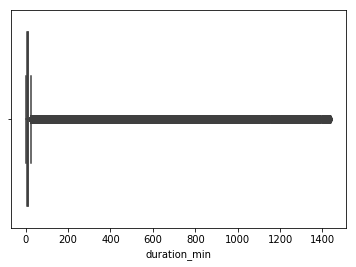

In [48]:
sns.boxplot(df_clean["duration_min"])

In [49]:
df_clean["duration_min"].describe(percentiles = [.25 , .50 , .75 ,.99])

count    1.364552e+06
mean     1.277215e+01
std      3.703711e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.300000e+01
99%      6.800000e+01
max      1.437000e+03
Name: duration_min, dtype: float64

In [50]:
df_clean[df_clean["duration_min"]  > 68]

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_time,user_type,member_age,start_month_year,start_time_month,start_time_weekday,start_time_hour,end_time_hour,age_bins,duration_min
2,3498,No,18587,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.925,1986.0,Female,...,2018-02-28 18:20:55.190,Customer,34.0,2018-02,February,Wed,18,23,26 - 35,309
3,3129,No,18558,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.450,1981.0,Male,...,2018-02-28 18:20:53.621,Customer,39.0,2018-02,February,Wed,18,23,36 - 45,309
183,1268,No,4196,162.0,37.800516,-122.272080,Franklin St at 9th St,2018-02-28 20:47:38.567,1972.0,Other,...,2018-02-28 19:37:42.381,Customer,48.0,2018-02,February,Wed,19,20,46 - 55,69
898,2016,No,36573,47.0,37.780955,-122.399749,4th St at Harrison St,2018-02-28 18:09:08.016,1988.0,Male,...,2018-02-28 07:59:34.204,Subscriber,32.0,2018-02,February,Wed,7,18,26 - 35,609
1621,3271,No,7013,248.0,37.855956,-122.259795,Telegraph Ave at Ashby Ave,2018-02-28 16:38:45.737,1987.0,Female,...,2018-02-28 14:41:52.138,Customer,33.0,2018-02,February,Wed,14,16,26 - 35,116
1877,1461,No,5952,56.0,37.773414,-122.427317,Koshland Park,2018-02-28 15:25:02.020,1963.0,Male,...,2018-02-28 13:45:49.700,Subscriber,57.0,2018-02,February,Wed,13,15,56 - 66,99
1948,3560,No,20498,61.0,37.776513,-122.411306,Howard St at 8th St,2018-02-28 14:55:11.207,1982.0,Male,...,2018-02-28 09:13:32.233,Subscriber,38.0,2018-02,February,Wed,9,14,36 - 45,341
2036,2079,No,5538,24.0,37.789677,-122.390428,Spear St at Folsom St,2018-02-28 14:09:40.146,1987.0,Male,...,2018-02-28 12:37:21.232,Customer,33.0,2018-02,February,Wed,12,14,26 - 35,92
2337,3698,No,8397,75.0,37.773793,-122.421239,Market St at Franklin St,2018-02-28 12:26:45.912,1989.0,Male,...,2018-02-28 10:06:48.774,Subscriber,31.0,2018-02,February,Wed,10,12,26 - 35,139
2648,2589,No,72175,75.0,37.773793,-122.421239,Market St at Franklin St,2018-02-28 10:18:35.984,1974.0,Male,...,2018-02-27 14:15:40.792,Customer,46.0,2018-02,February,Tue,14,10,46 - 55,1202


In [51]:
#removing rows that have duration_min > 150 minutes
df_clean = df_clean[df_clean["duration_min"] < 150]

**Test**

In [52]:
#checking
df_clean.sample(10)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_time,user_type,member_age,start_month_year,start_time_month,start_time_weekday,start_time_hour,end_time_hour,age_bins,duration_min
6332,2085,No,406,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-27 15:10:32.543,1960.0,Male,...,2018-02-27 15:03:45.619,Subscriber,60.0,2018-02,February,Tue,15,15,56 - 66,6
932397,3851,No,209,72.0,37.772406,-122.435650,Page St at Scott St,2018-05-12 14:29:18.655,1978.0,Male,...,2018-05-12 14:25:49.265,Subscriber,42.0,2018-05,May,Sat,14,14,36 - 45,3
1061955,599,No,756,31.0,37.783813,-122.434559,Raymond Kimbell Playground,2018-01-14 11:29:58.177,1985.0,Male,...,2018-01-14 11:17:21.454,Subscriber,35.0,2018-01,January,Sun,11,11,26 - 35,12
1464921,602,No,1061,130.0,37.757369,-122.392057,22nd St Caltrain Station,2018-04-19 07:10:13.460,1994.0,Female,...,2018-04-19 06:52:31.947,Subscriber,26.0,2018-04,April,Thu,6,7,26 - 35,17
53739,1359,No,422,197.0,37.808848,-122.249680,El Embarcadero at Grand Ave,2018-02-13 18:30:19.952,1992.0,Male,...,2018-02-13 18:23:17.256,Subscriber,28.0,2018-02,February,Tue,18,18,26 - 35,7
810839,274,NA,518,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2017-07-11 15:22:15.832,1968.0,Male,...,2017-07-11 15:13:37.291,Subscriber,52.0,2017-07,July,Tue,15,15,46 - 55,8
953792,530,No,205,182.0,37.809013,-122.268247,19th Street BART Station,2018-05-09 09:08:18.296,1976.0,Female,...,2018-05-09 09:04:53.208,Subscriber,44.0,2018-05,May,Wed,9,9,36 - 45,3
877907,3153,No,869,37.0,37.785000,-122.395936,2nd St at Folsom St,2018-05-22 09:41:37.268,1992.0,Male,...,2018-05-22 09:27:08.226,Subscriber,28.0,2018-05,May,Tue,9,9,26 - 35,14
752727,2643,NA,342,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2017-08-10 16:09:43.428,1968.0,Male,...,2017-08-10 16:04:01.079,Subscriber,52.0,2017-08,August,Thu,16,16,46 - 55,5
460666,2052,NA,1044,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2017-11-07 18:22:45.881,1993.0,Male,...,2017-11-07 18:05:21.821,Subscriber,27.0,2017-11,November,Tue,18,18,26 - 35,17


In [53]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358803 entries, 0 to 1538085
Data columns (total 24 columns):
bike_id                    1358803 non-null object
bike_share_for_all_trip    1358803 non-null object
duration_sec               1358803 non-null int64
end_station_id             1358803 non-null object
end_station_latitude       1358803 non-null float64
end_station_longitude      1358803 non-null float64
end_station_name           1358803 non-null object
end_time                   1358803 non-null datetime64[ns]
member_birth_year          1358803 non-null float64
member_gender              1358803 non-null object
start_station_id           1358803 non-null object
start_station_latitude     1358803 non-null float64
start_station_longitude    1358803 non-null float64
start_station_name         1358803 non-null object
start_time                 1358803 non-null datetime64[ns]
user_type                  1358803 non-null object
member_age                 1358803 non-null float64

**Saving the cleaned data**

In [54]:
df_clean.to_csv('fordgo_master_clean.csv', index = False)

## Univariate Exploration

> In this section, I will investigate the distributions of individual variables and find out various insights from them

Text(0.5, 1.0, 'Ford GoBike sharing of trips ')

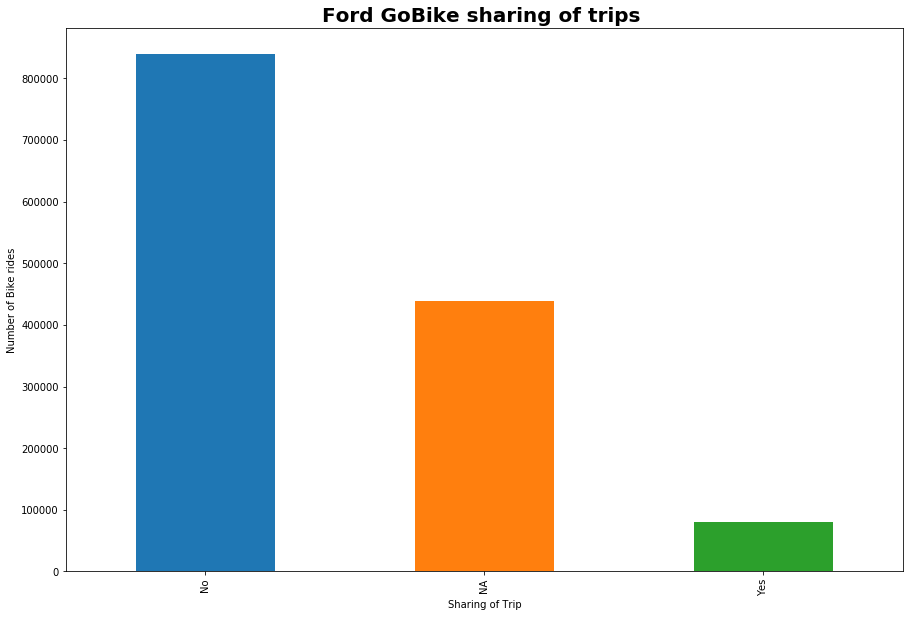

In [56]:
plt.figure(figsize= (15,10))
df_clean.bike_share_for_all_trip.value_counts().plot(kind = "bar")
plt.xlabel("Sharing of Trip")
plt.ylabel("Number of Bike rides")
plt.title("Ford GoBike sharing of trips " , fontsize = 20 , fontweight = "bold")

#### Observation 1 : Most number of bike rides are done without sharing the trip , followed by NA(Not Applicable) ,which maybe because the bike sharing data was not collected in the year 2017

In [57]:
df_clean.duration_min.describe()

count    1.358803e+06
mean     1.094620e+01
std      1.032480e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.300000e+01
max      1.490000e+02
Name: duration_min, dtype: float64

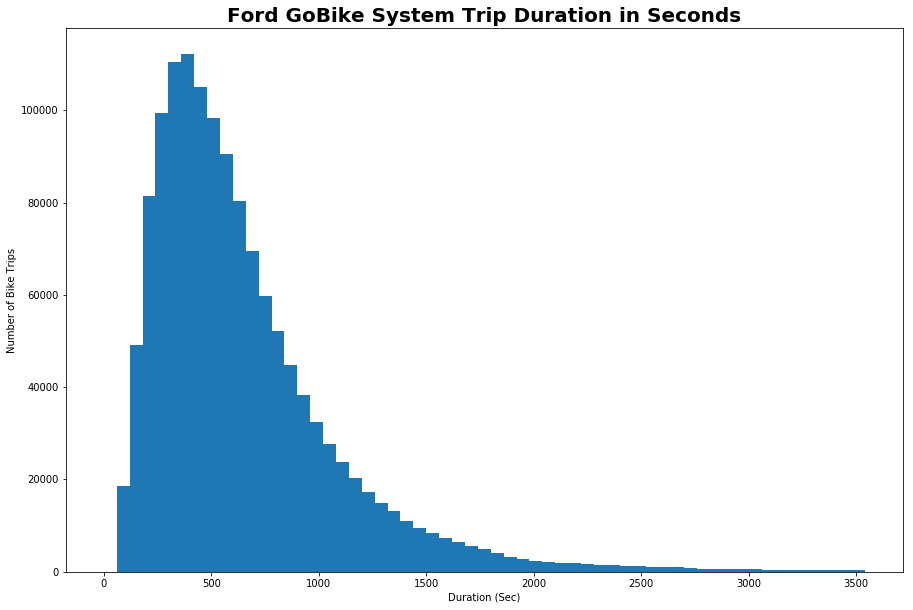

In [58]:
# Duration of the bike rides - in seconds
bin_edges = np.arange(0, 3600, 60)

plt.figure(figsize= (15,10))
plt.hist(data = df_clean, x = 'duration_sec', bins = bin_edges);

plt.title("Ford GoBike System Trip Duration in Seconds", fontsize=20, fontweight='bold')
plt.xlabel('Duration (Sec)')
plt.ylabel('Number of Bike Trips');

#### Observation 2 : Most of the trip fall around 500 seconds and the data is skewed to the right with most of the data ranging between 250-750 seconds and ranging till 3500 seconds

In [59]:
df_clean.duration_min.describe()

count    1.358803e+06
mean     1.094620e+01
std      1.032480e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.300000e+01
max      1.490000e+02
Name: duration_min, dtype: float64

In [60]:
df_clean.duration_min.quantile(.99)

50.0

In [61]:
df_clean.duration_min.describe()

count    1.358803e+06
mean     1.094620e+01
std      1.032480e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.300000e+01
max      1.490000e+02
Name: duration_min, dtype: float64

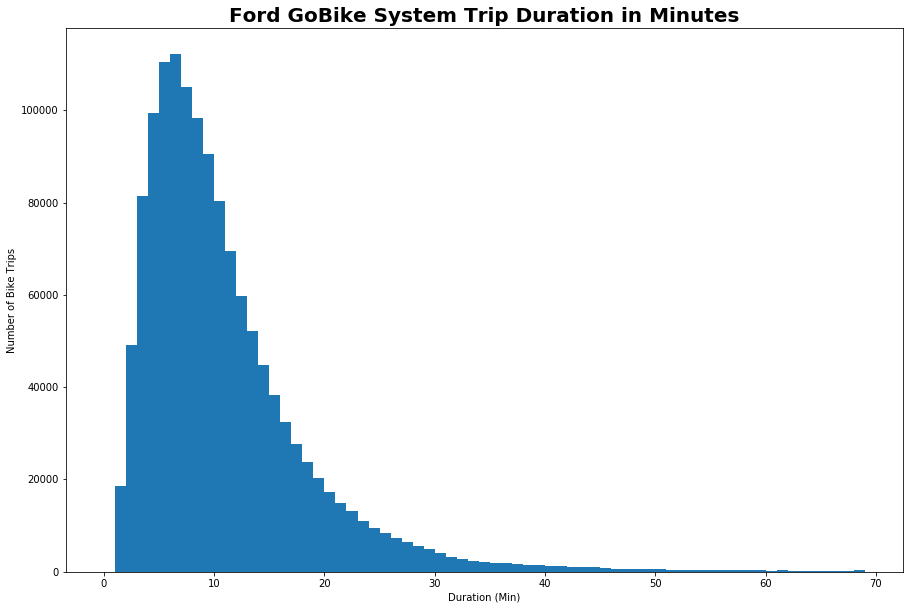

In [62]:
# Duration of the bike rides - in minutes
bin_edges = np.arange(0, 70 ,1)

plt.figure(figsize= (15,10))
plt.hist(data = df_clean, x = 'duration_min', bins = bin_edges);

plt.title("Ford GoBike System Trip Duration in Minutes", fontsize = 20, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.ylabel('Number of Bike Trips');

#### Observation 3 :Most of the trip fall around 10 minutes and the data is skewed to the right with most of the data ranging between 5-20 minutes and ranging till 68 minutes ,which is highly unlikely

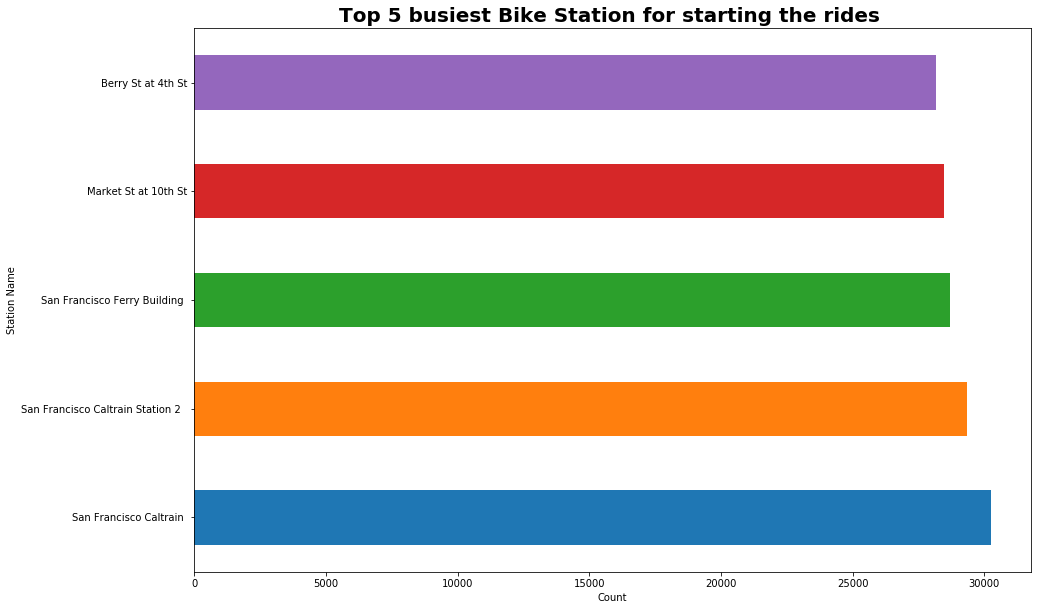

In [63]:
a = df_clean.start_station_name.value_counts()[:5]
li = a.index.tolist()
new = []
for i in li :
    new.append(i.split("(")[0])
    
a.index = new
a.plot(kind = "barh" ,figsize = (15,10))

plt.title("Top 5 busiest Bike Station for starting the rides ", fontsize=20, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Station Name');

#### Observation 4 : San Francisco Caltrain is the most busiest station among all stations from where the bike trips start

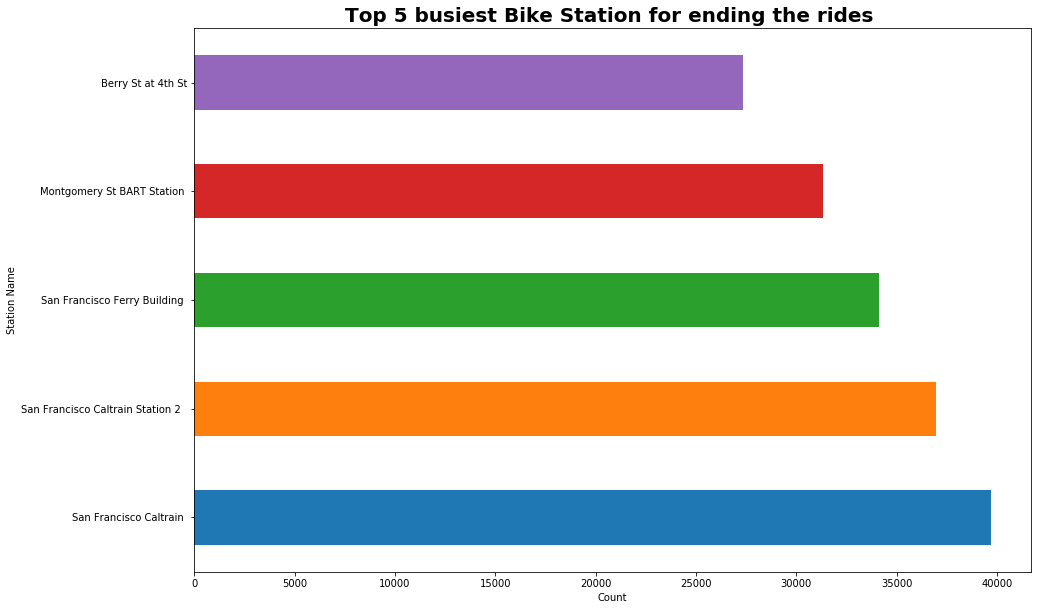

In [64]:
b = df_clean.end_station_name.value_counts()[:5]
li1 = b.index.tolist()
new1 = []
for i in li1 :
    new1.append(i.split("(")[0])
    
b.index = new1
b.plot(kind = "barh" ,figsize = (15,10))

plt.title("Top 5 busiest Bike Station for ending the rides ", fontsize=20, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Station Name');

#### Observation 5 : San Francisco Caltrain is the most busiest station among all stations , where the bike trips end

Text(0.5, 1.0, 'Ford GoBike usage by Genders')

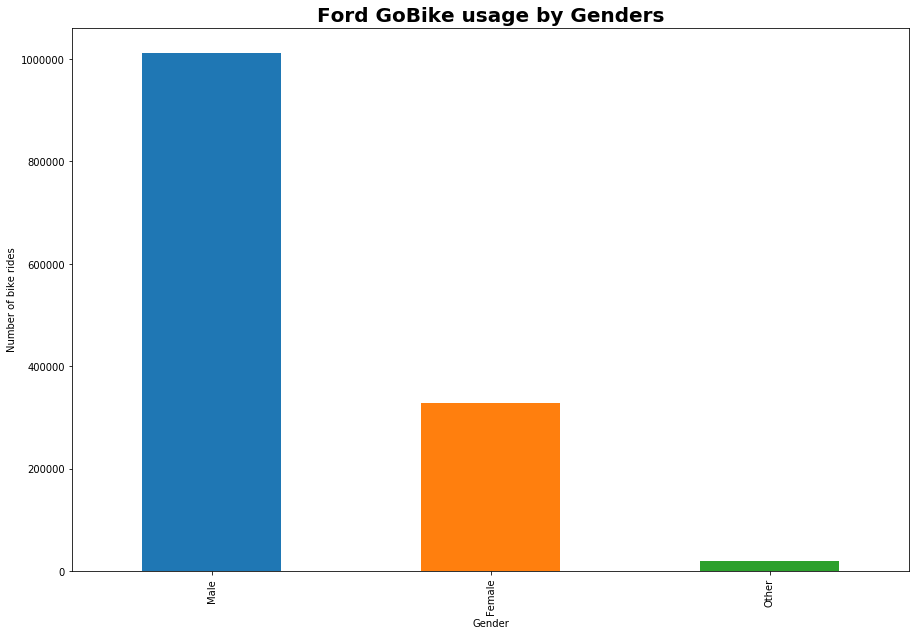

In [65]:
plt.figure(figsize = (15,10))
df_clean.member_gender.value_counts().plot(kind = "bar")
plt.xlabel("Gender")
plt.ylabel("Number of bike rides")
plt.title("Ford GoBike usage by Genders" , fontsize = 20 , fontweight = "bold")

#### Observation 6 : Most of the users of the bikes service are Males followed by females.

Text(0.5, 1.0, 'Ford GoBike usage by different users')

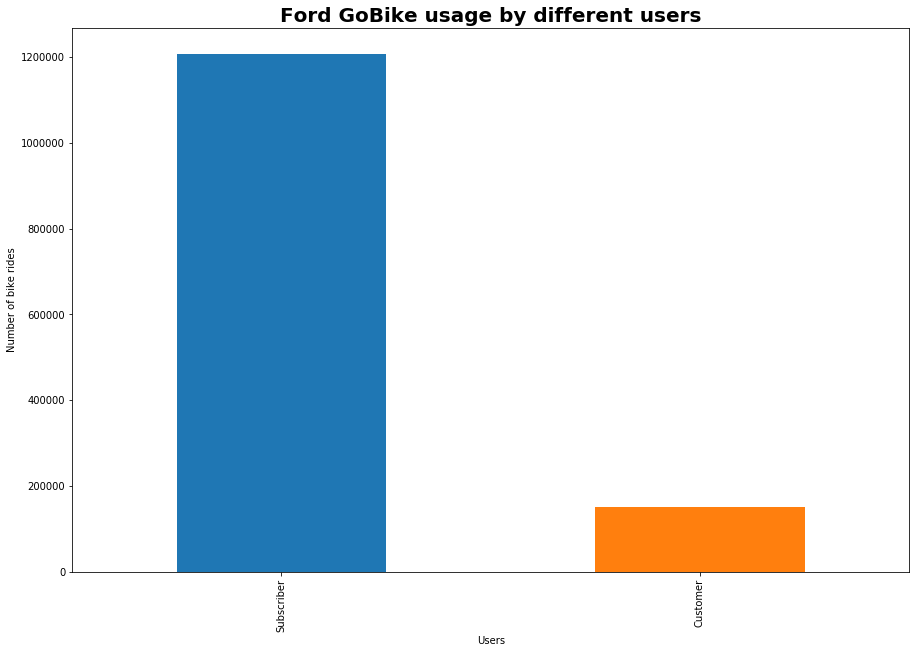

In [66]:
plt.figure(figsize = (15,10))
df_clean.user_type.value_counts().plot(kind = "bar")
plt.xlabel("Users")
plt.ylabel("Number of bike rides")
plt.title("Ford GoBike usage by different users" , fontsize = 20 ,fontweight = "bold")

#### Observation 7 : Most of the users of the bike service are the Subscribers.Customers use the bike service very less as compared to the Subscribers

Text(0.5, 1.0, 'Ford GoBike usage by month')

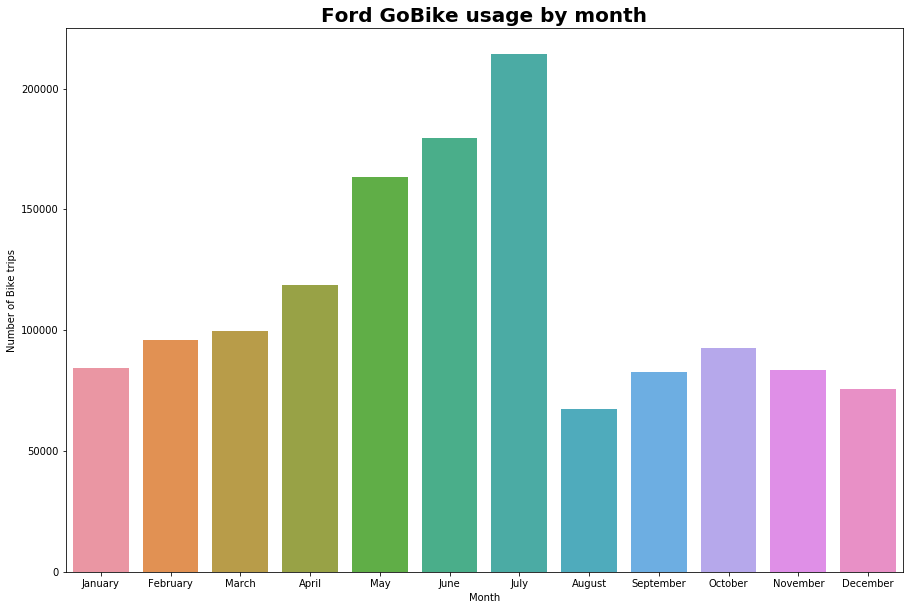

In [67]:
#usage by month
month = ["January" , "February" , "March" , "April" , "May" , "June" , "July" , "August" , "September" ,"October" ,"November" ,"December"]
plt.figure(figsize= (15,10))
sns.countplot(x = "start_time_month" , data = df_clean  ,order=month)

plt.xlabel("Month")
plt.ylabel("Number of Bike trips")
plt.title('Ford GoBike usage by month' , fontweight = "bold" , fontsize = 20)


#### Observation 8 : July is the peak month in which the bike service is used the most.Most of the trips are done from the month of April to July, which are the early summer months.

Text(0.5, 1.0, 'Ford GoBike Usage by Weekday')

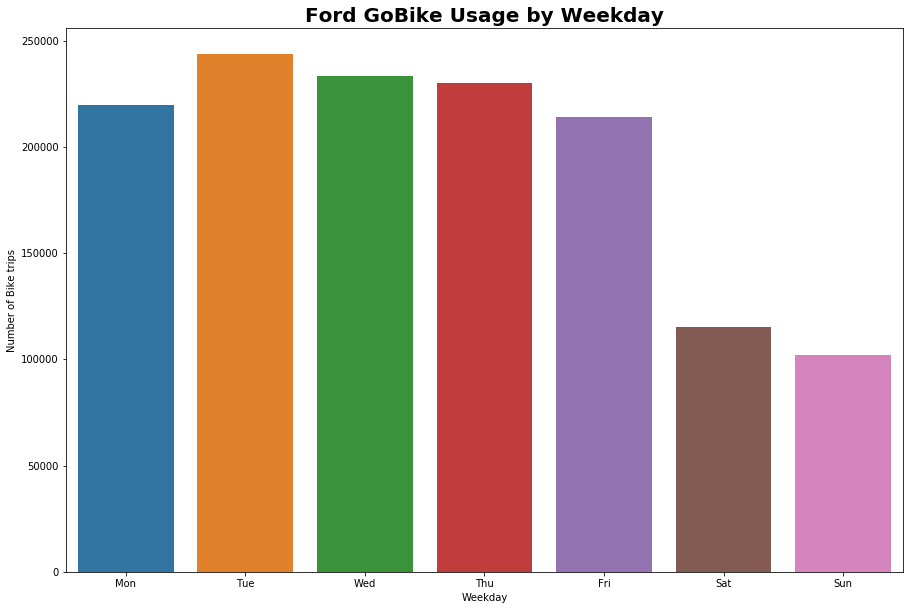

In [68]:
#usage by weekdays
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize= (15,10))
sns.countplot(x = df_clean["start_time_weekday"] , data = df_clean ,order = weekdays)

plt.xlabel("Weekday")
plt.ylabel("Number of Bike trips")
plt.title('Ford GoBike Usage by Weekday' , fontweight = "bold" , fontsize = 20)

#### Observation 9 : Weekdays are the most busiest days compared to weekends.Bike service has the highest usage on Tuesday.Wednesday and Thursday have almost same usage of bikes ,followed by Thursday and Monday and then the usage dips on weekend

Text(0.5, 1.0, 'Ford GoBike Usage by Hours')

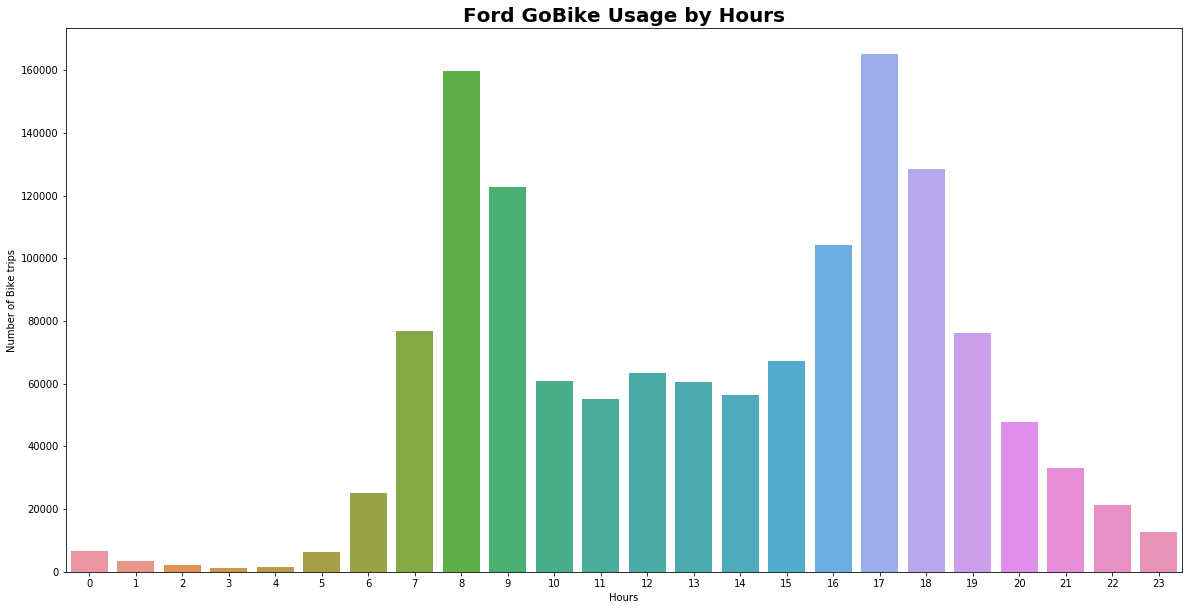

In [69]:
#usage by hours

plt.figure(figsize= (20,10))
sns.countplot(x = df_clean["start_time_hour"] , data = df_clean)

plt.xlabel("Hours")
plt.ylabel("Number of Bike trips")
plt.title('Ford GoBike Usage by Hours' , fontweight = "bold" , fontsize = 20)

#### Observation 10 : The morning hours(8-9am) and afternoon hours(5-6pm) are the busiest hours throught the day.It maybe because most of the trips are used to commute to office/school 

Text(0.5, 1.0, 'Age groups of people using Ford GoBike service')

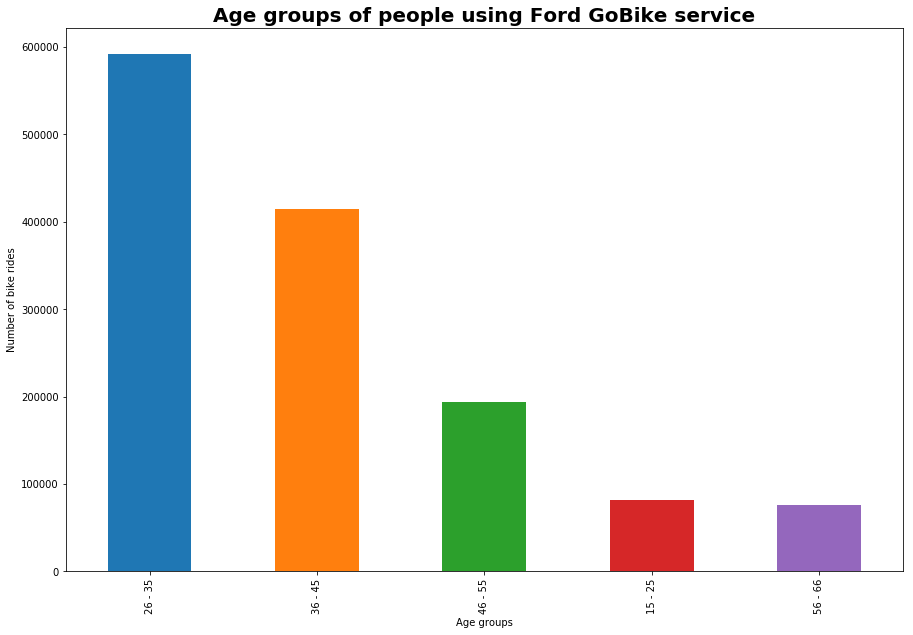

In [70]:
plt.figure(figsize = (15,10))
df_clean.age_bins.value_counts().plot(kind = "bar")

plt.xlabel("Age groups")
plt.ylabel("Number of bike rides")
plt.title("Age groups of people using Ford GoBike service" , fontsize = 20 , fontweight = "bold")

#### Observation 11 : Most of the users of the bike service fall under the age gap of 26-35 years ,followed by 36-45 years.It maybe because the bike service are mostly used by the American working class people

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> My variables of interest are Trip duration and gender.Trip duration has lots of outtliers ,so I have considered data for which trip duration is less than 68 minutes.Gender column has 3 variables namely Male , Female and Others.Males are the highest number of users followed by females.Trip duration data is skewed to the right.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I investigated various variables inluding Type of user , Age and Start time of the trip.There are 2 types of users namely Subscribers and Customers.As infered from the data the Subscribers are daily commuters and use the service mostlty on weekdays ,while Customers are more of casual users and use the service mostly on weekends.There were outliers in the age of the data ,the maximum age was 139 years ,which is bizarre and 99% of the data is less than age 68 years.I have taken data where age is less than 64 years using the IQR technique.Start time of the trip ranges from 12am to 11pm ,while most of the trips take place at 8-9am and 5-6pm

## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in the data.

In [71]:
#checking for correlation between the quantitaive variables
df_clean[["duration_sec" , "duration_min" ,"member_age" , "start_time_hour" ]].corr()

,duration_sec,duration_min,member_age,start_time_hour
duration_sec,1.000000,0.999610,-0.006863,0.019108
duration_min,0.999610,1.000000,-0.006840,0.019132
member_age,-0.006863,-0.006840,1.000000,-0.061749
start_time_hour,0.019108,0.019132,-0.061749,1.000000


Text(0.5, 1.0, 'Scatter plot of Member age and Duration of the trip')

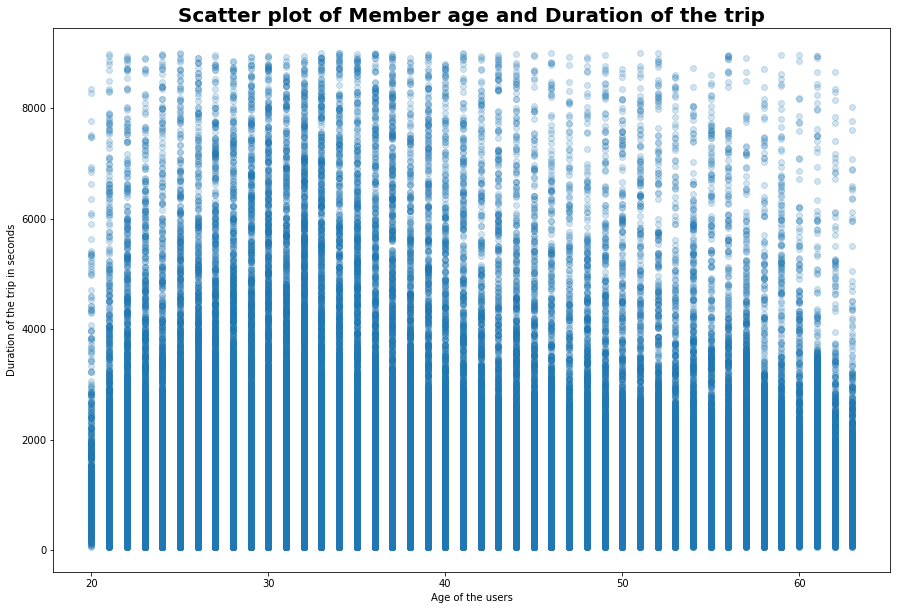

In [72]:
plt.figure(figsize = (15 , 10))

plt.scatter(x = df_clean["member_age"] , y = df_clean["duration_sec"] , alpha = 1/5)
plt.xlabel("Age of the users")
plt.ylabel("Duration of the trip in seconds")
plt.title("Scatter plot of Member age and Duration of the trip" , fontweight = "bold" , fontsize = 20)



Text(0.5, 1.0, 'Heat map of Member age and Duration of the trip')

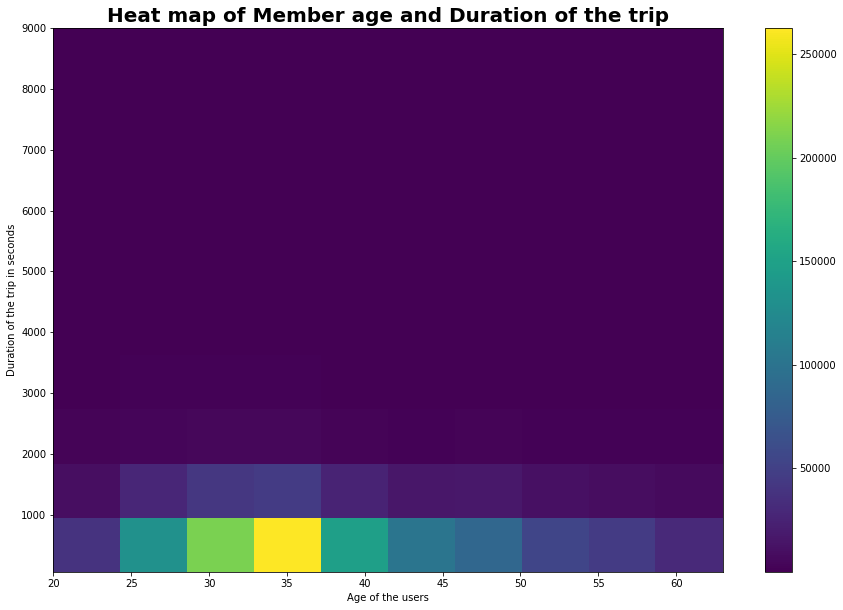

In [73]:
plt.figure(figsize = (15 , 10))
plt.hist2d(x = df_clean["member_age"] , y = df_clean["duration_sec"])
plt.colorbar()

plt.xlabel("Age of the users")
plt.ylabel("Duration of the trip in seconds")
plt.title("Heat map of Member age and Duration of the trip" , fontweight = "bold" , fontsize = 20)


#### Observation 12 : The longest duration of the trips are done by the users falling in 30-40 years of age falling below 2000 seconds

Text(0.5, 1.0, 'Heat map of Member age and hour of the day')

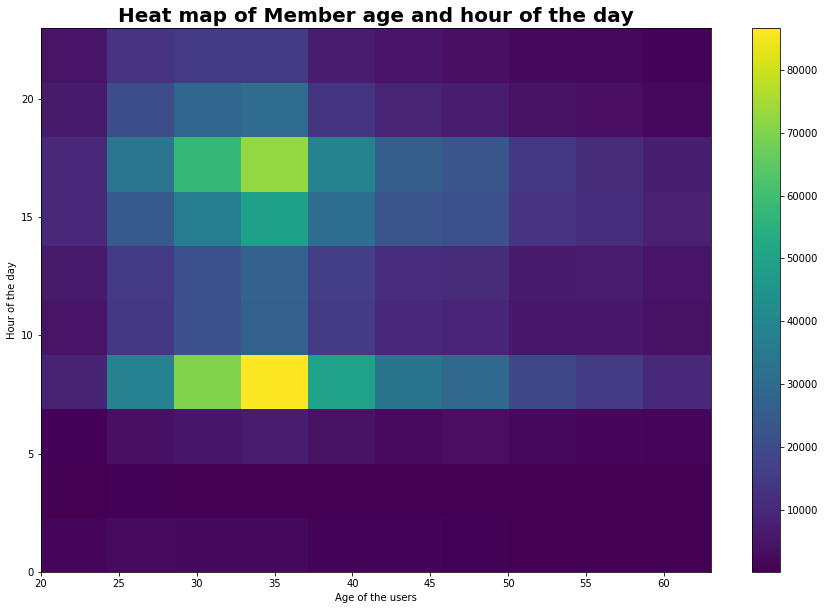

In [74]:
plt.figure(figsize = (15,10))
plt.hist2d(x = df_clean["member_age"] , y = df_clean["start_time_hour"])
plt.colorbar()

plt.xlabel("Age of the users")
plt.ylabel("Hour of the day")
plt.title("Heat map of Member age and hour of the day" , fontweight = "bold" , fontsize = 20)

#### Observation 13 : Users falling in the age group of 25 to 40 years have the largest number of trip between the peak hours of 8-9 am to 5-6pm

C:\Users\anubh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Violin plot of duration of bike trips by gender')

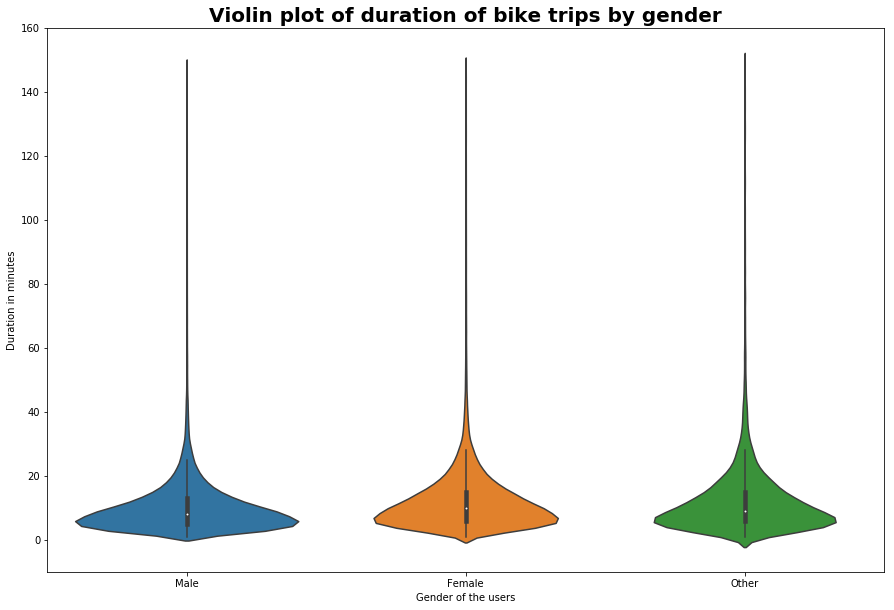

In [75]:
plt.figure(figsize = (15,10))
sns.violinplot(df_clean["member_gender"] , df_clean["duration_min"])

plt.xlabel("Gender of the users")
plt.ylabel("Duration in minutes")
plt.title("Violin plot of duration of bike trips by gender" , fontweight = "bold" , fontsize = 20)

Text(0.5, 1.0, 'Violin plot and boxplot of duration of bike trips by gender')

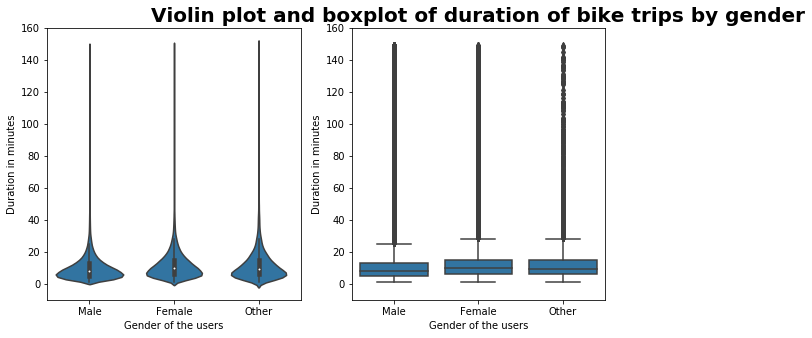

In [76]:
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(df_clean["member_gender"] , df_clean["duration_min"], color = base_color)
plt.xlabel("Gender of the users")
plt.ylabel("Duration in minutes")
# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(df_clean["member_gender"] , df_clean["duration_min"], color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xlabel("Gender of the users")
plt.ylabel("Duration in minutes")

plt.title("Violin plot and boxplot of duration of bike trips by gender" , fontweight = "bold" , fontsize = 20)

#### Observation 14 : Females are taking the longest trips(in minutes) among all the genders.Females trip duration falls between 15-17 minutes and males tend to take trips falling between 13-15 minutes. Most of the bike trips fall below 35 minutes of time, hence creating a scenario that the bike trips are usually used for shorter trips

Text(0.5, 1.0, 'Ford GoBike Usage by Month')

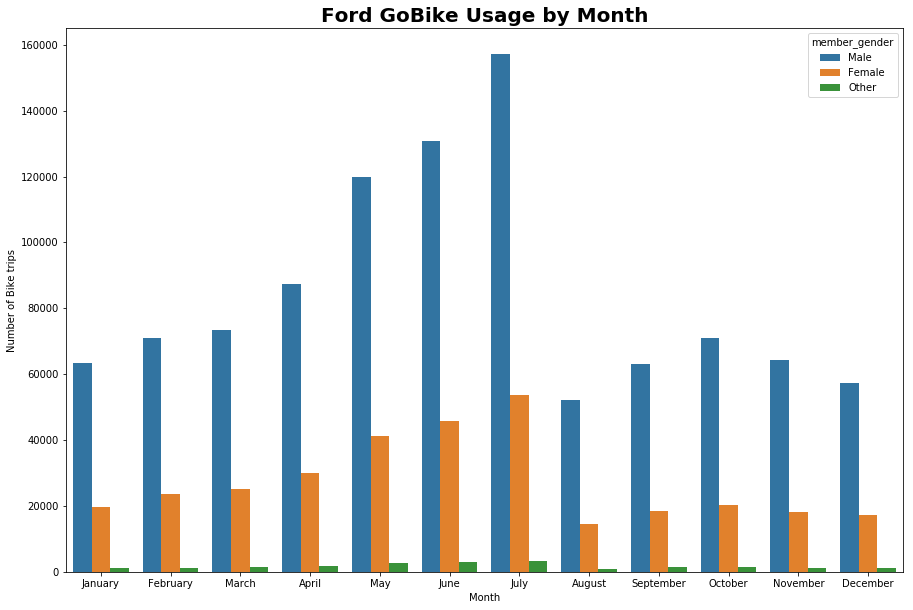

In [77]:
#usage by month
month = ["January" , "February" , "March" , "April" , "May" , "June" , "July" , "August" , "September" ,"October" ,"November" ,"December"]
plt.figure(figsize= (15,10))
sns.countplot(x = "start_time_month" , hue = "member_gender" , data = df_clean  ,order=month)

plt.xlabel("Month")
plt.ylabel("Number of Bike trips")
plt.title('Ford GoBike Usage by Month' , fontweight = "bold" , fontsize = 20)


#### Observation 15: Male users are the largest users of bike trips and are using the bike trips mostly in the early summer months and the usage peaking in the month of July.Female users are also having the same trend like the Male users.While for other gender people , the rate of usage is almost same

Text(0.5, 1.0, 'Ford GoBike Usage by Month')

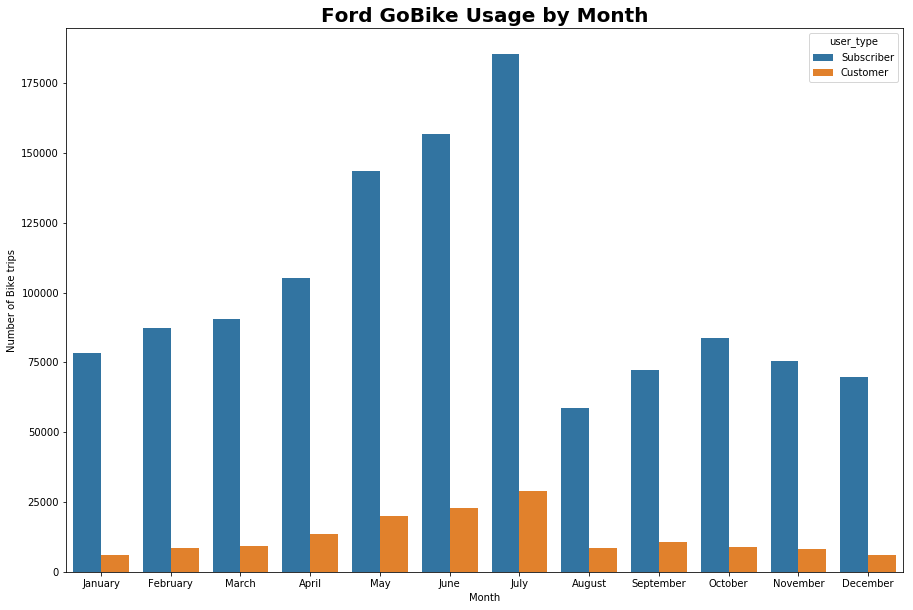

In [78]:
#usage by month
month = ["January" , "February" , "March" , "April" , "May" , "June" , "July" , "August" , "September" ,"October" ,"November" ,"December"]
plt.figure(figsize= (15,10))
sns.countplot(x = "start_time_month" , hue = "user_type" , data = df_clean  ,order=month)

plt.xlabel("Month")
plt.ylabel("Number of Bike trips")
plt.title('Ford GoBike Usage by Month' , fontweight = "bold" , fontsize = 20)

#### Observation 16 : Subscribers are the largest users of the bike service and the usage of the bike service peaks in the month of July .Customers usage also rise in the month of July and follows the same trend like the customer but with very less usage as compared to Subscribers

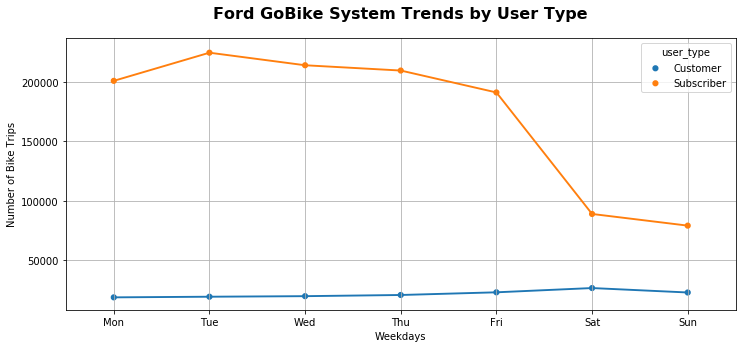

In [79]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(12, 5))

df_cleaned_user_week = df_clean.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sns.pointplot(data=df_cleaned_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

#### Observation 17 : Customers have very less usage of bike service as compared to Subscribers.There is a slight increase in the usage by Customers on Saturday and again dipping post sunday ,which may be because the customers are tourists and visit SF on weekends.Subscribers have the highest usage of service during the weekdays and the usage dips in weekends.

Text(0.5, 1.0, 'Ford GoBike Usage by Hours')

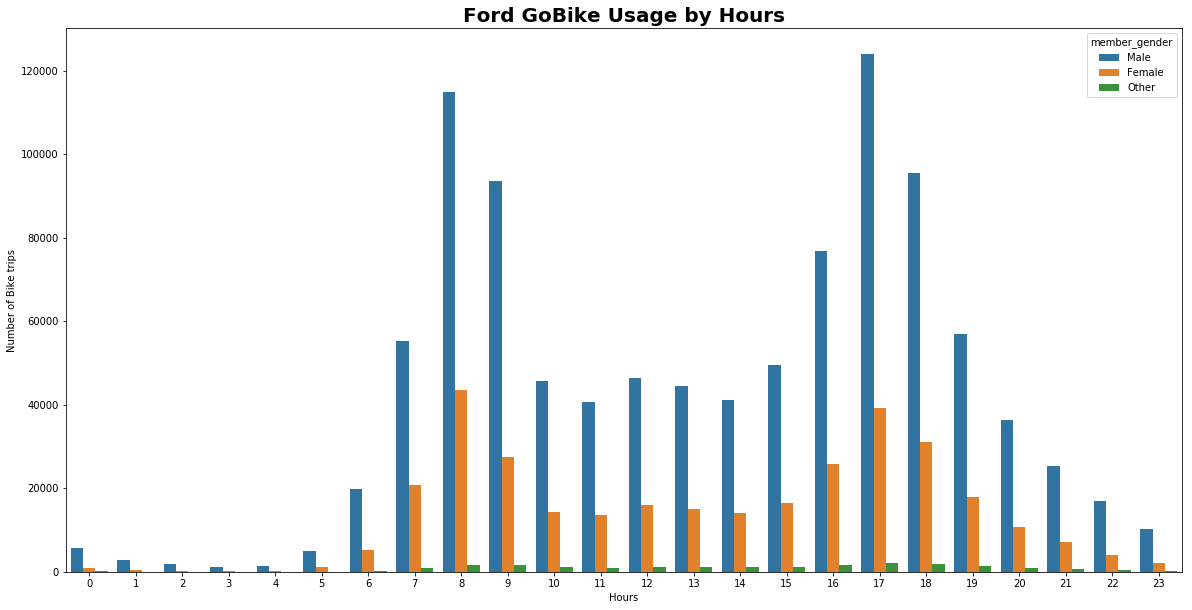

In [80]:
# Customer Usage by Duration vs. Subscriber Usage by Hour

plt.figure(figsize= (20,10))
sns.countplot(x = "start_time_hour" , hue = "member_gender" , data = df_clean)

plt.xlabel("Hours")
plt.ylabel("Number of Bike trips")
plt.title('Ford GoBike Usage by Hours' , fontweight = "bold" , fontsize = 20)


#### Observation 18 : Male users have the highest usage of the bike trips .Both Male and female use the bike service mostly during the morning and evening hours of the day

Text(0.5, 1.0, 'Ford GoBike Usage by Hours')

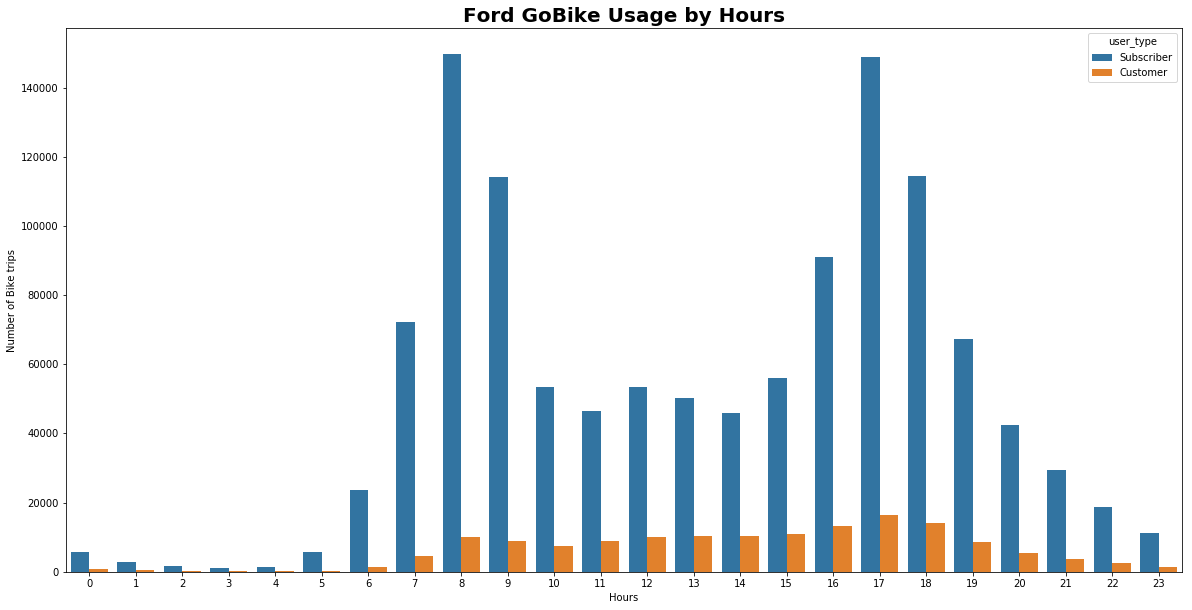

In [81]:
#usage by hours

plt.figure(figsize= (20,10))
sns.countplot(x = df_clean["start_time_hour"]  , hue = "user_type", data = df_clean)

plt.xlabel("Hours")
plt.ylabel("Number of Bike trips")
plt.title('Ford GoBike Usage by Hours' , fontweight = "bold" , fontsize = 20)

#### Observation 19 : Subscribers are the majority users of the bike rides.Subscribers use the bike ride service mostly during the morning hours and evening hours , while the usage of bike rides by the Customers is high throughout the day ,which maybe the case that customers are tourists or non-working class people and use the bike service throughout the day and Subscribers are users who use the bike service to commute to their work/school

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I tried to explore the relationship between the data with respect to user types and user gender.The customers are casual users,mostly tourists who use the bike service to explore the city during weekends or holidays.Subscribers are daily commuters who use the bike service mostly on weekend to travel to office/school.The bike service is used mostly between 8-9am and 5-6pm.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes ,there is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably becuase the Customers use the service on weekends to roam around the city and maybe the customers are tourists that visit the city and use the bike service to explore the city.While the subscribers use the bike service for shorter duration,mostly for office/school commute or commute between stations

## Multivariate Exploration

> I created plots of three or more variables to investigate the Ford GoBike for more interesting insights

In [82]:
age_order = ["15 - 25" , "26 - 35" , "36 - 45" , "46 - 55" , "56 - 66"]

Text(0.5, 1.0, 'Scatter plot of Member age and Duration of the trip wrt Member Gender')

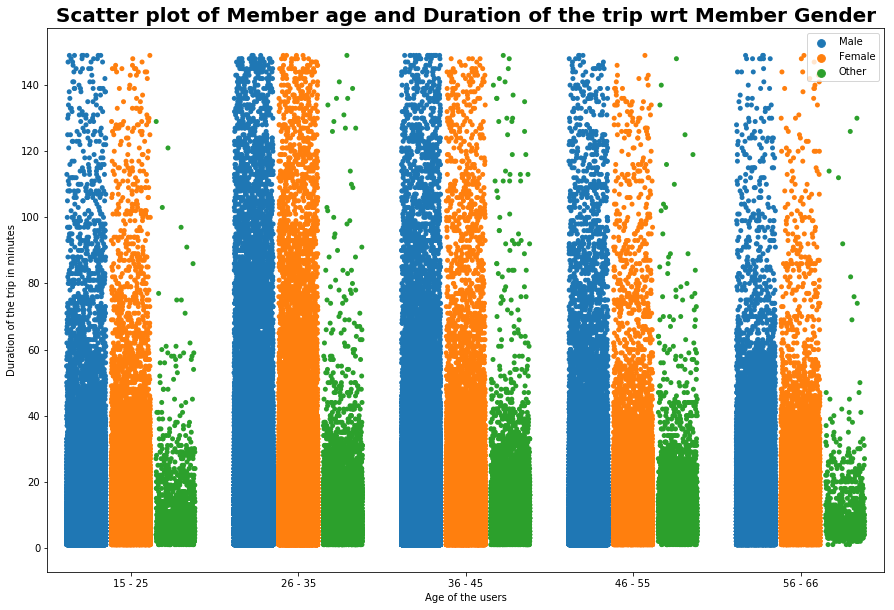

In [83]:
plt.figure(figsize = (15 , 10))

sns.stripplot(x = "age_bins" , y = "duration_min" , hue = "member_gender" ,
                data = df_clean , jitter = 0.35 , dodge = True ,order=age_order)             
    
plt.xlabel("Age of the users")
plt.ylabel("Duration of the trip in minutes")
plt.legend()
plt.title("Scatter plot of Member age and Duration of the trip wrt Member Gender" , fontweight = "bold" , fontsize = 20)


#### Observation 20 : Most of the users are Male ,followed by Females and Other users are the least.Users in the age gap 15-25 years ,tend to take bike trips of duration below 100 minutes .Users between age gap 26-35 years ,tend to take longer duration of trips below 140 minutes. Users in age group 36-45 mostly take trip duration below 120 minutes.Users in age group 46-55 take rides mostly below 100 minutes.People between 55-66 years take the most shortest rides, followed by people between 15-25 years.

<Figure size 1800x720 with 0 Axes>

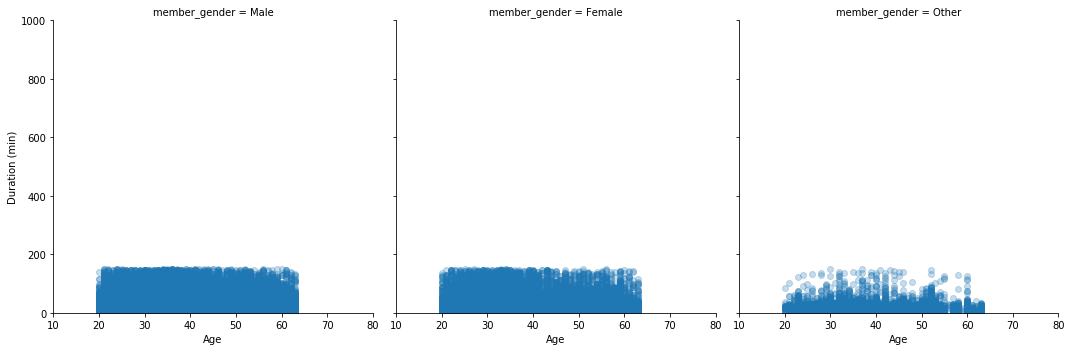

In [84]:
plt.figure(figsize = (25,10))
genders = sns.FacetGrid(data = df_clean, col = 'member_gender', col_wrap = 3, height = 5 ,
                 xlim = [10, 80], ylim = [0, 1000])
genders.map(plt.scatter, 'member_age', 'duration_min', alpha=0.25)
genders.set_xlabels('Age')
genders.set_ylabels('Duration (min)')

plt.show()

#### Observation 21 : Male users range mostly between 20-60 years of age and the all the trip durations by male users are below 160 minutes.Male users till 45 years tend to use the service for longer duration compared to Male users above 45 years.Female users also lay between 20-60 years of age and Female users belwo 40 years have longer trip duration compared to users above 40 years.Other users tend to have very short duration trip mostly around 20-30 minutes ,with very few trip above 60 minutes

Text(0.5, 1.0, 'Scatter plot of Member age and Duration of the trip wrt User Type')

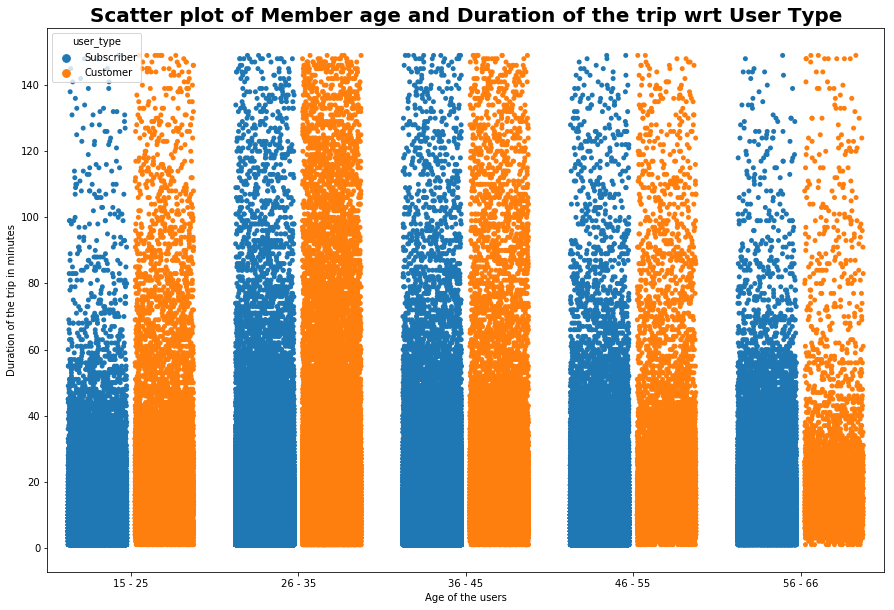

In [85]:
plt.figure(figsize = (15 , 10))

sns.stripplot(x = "age_bins" , y = "duration_min" , data = df_clean , hue = "user_type",
                 jitter = 0.35 , dodge = True , order = age_order)
plt.xlabel("Age of the users")
plt.ylabel("Duration of the trip in minutes")
plt.title("Scatter plot of Member age and Duration of the trip wrt User Type" , fontweight = "bold" , fontsize = 20)

#### Observation 22 : Users below 25 years of age are mostly Customers and tend to take longer duration of rides compared to the Subscribers.Subscribers falling between 26-35 years are taking shorter duration rides compared to Customers who are taking longer duration rides .While users falling between age gap 36-45 tend to take shorter duration rides than users between age 25-36 years .Post the age gap of 46 years , users tend to take shorter duration of trips while the number of subscriber are more than customers.Overall customers tend to take longer duration of trips compared to subscribers

Text(0.5, 1.0, 'Scatter plot of Member gender and Duration of the trip wrt User Type')

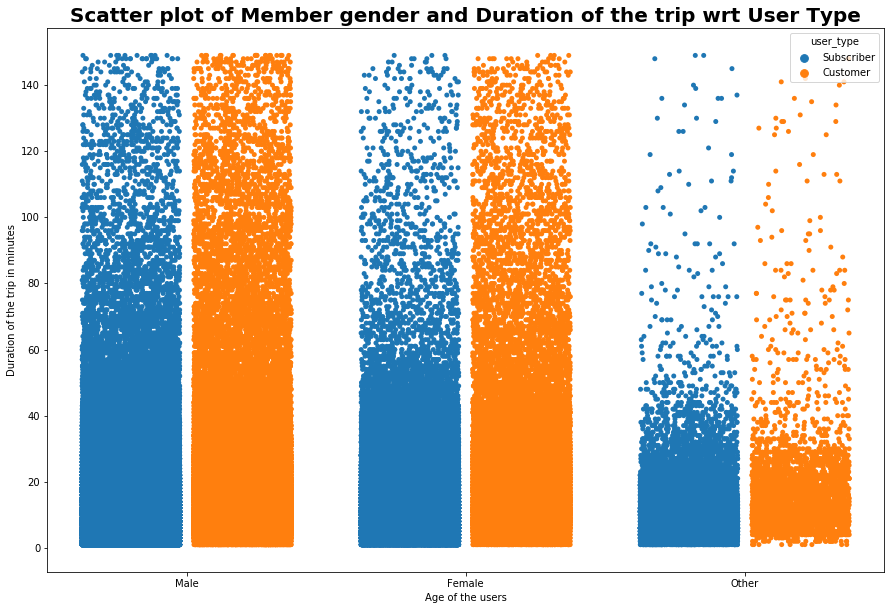

In [86]:
plt.figure(figsize = (15 , 10))

sns.stripplot(x = "member_gender" , y = "duration_min" , data = df_clean ,hue = "user_type",
                jitter = 0.35 , dodge = True )

plt.xlabel("Age of the users")
plt.ylabel("Duration of the trip in minutes")
plt.title("Scatter plot of Member gender and Duration of the trip wrt User Type" , fontweight = "bold" , fontsize = 20)

#### Observation 23 : Male subscribers tend to take only short duration rides while Male customers tend to take longer duration rides.Female subscribers also tend to take more shorter duration rides and Female customers tend to longer duration rides. Other gender subscribers tend to take longer rides compared to customers of other gender.The reason why most of the subscribers take shorter duration rides can be that most of them use the bike service to ferry around shorter distance between stations or schools.While Customers who are more of a casual user who use the bike service to explore the city or shop around the city,hence taking longer rides

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> This exploration helped me to find out that most of the users fall in the age group of 25-36 and most of the users of the bike service are males and their number has kept of increasing at a steady rate over the years, while female users tend to use the service for longer duration of time.
### Were there any interesting or surprising interactions between features?

> The usage of bike service by the Other gender is almost flat over the years.The male and female users follow almost the same trend over the years

- https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
- https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns